In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv(r"/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv")
df.head()

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
print(df.columns.tolist())


['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']


In [4]:
df.drop(
    columns=['Unnamed: 0', 'UTC',  'TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT'],
    inplace=True
)
df

Temperature[C]  Humidity[%]  eCO2[ppm]  Fire Alarm
0              20.000        57.36        400           0
1              20.015        56.67        400           0
2              20.029        55.96        400           0
3              20.044        55.28        400           0
4              20.059        54.69        400           0
...               ...          ...        ...         ...
62625          18.438        15.79        400           0
62626          18.653        15.87        400           0
62627          18.867        15.84        400           0
62628          19.083        16.04        400           0
62629          19.299        16.52        400           0

[62630 rows x 4 columns]

In [5]:
df.describe()

Temperature[C]   Humidity[%]     eCO2[ppm]    Fire Alarm
count    62630.000000  62630.000000  62630.000000  62630.000000
mean        15.970424     48.539499    670.021044      0.714626
std         14.359576      8.865367   1905.885439      0.451596
min        -22.010000     10.740000    400.000000      0.000000
25%         10.994250     47.530000    400.000000      0.000000
50%         20.130000     50.150000    400.000000      1.000000
75%         25.409500     53.240000    438.000000      1.000000
max         59.930000     75.200000  60000.000000      1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   eCO2[ppm]       62630 non-null  int64  
 3   Fire Alarm      62630 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.9 MB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


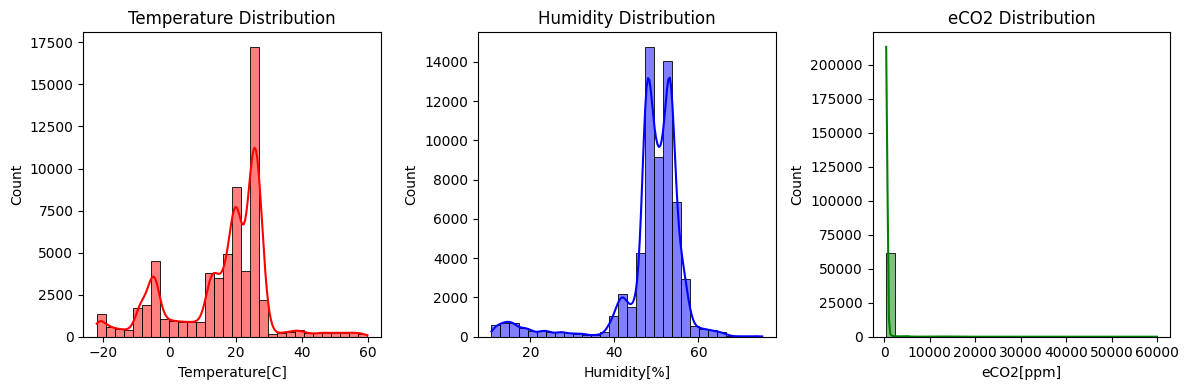

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Temperature & Humidity & eCO2
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['Temperature[C]'], bins=30, kde=True, color="red")
plt.title("Temperature Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Humidity[%]'], bins=30, kde=True, color="blue")
plt.title("Humidity Distribution")

plt.subplot(1,3,3)
sns.histplot(df['eCO2[ppm]'], bins=30, kde=True, color="green")
plt.title("eCO2 Distribution")

plt.tight_layout()
plt.show()




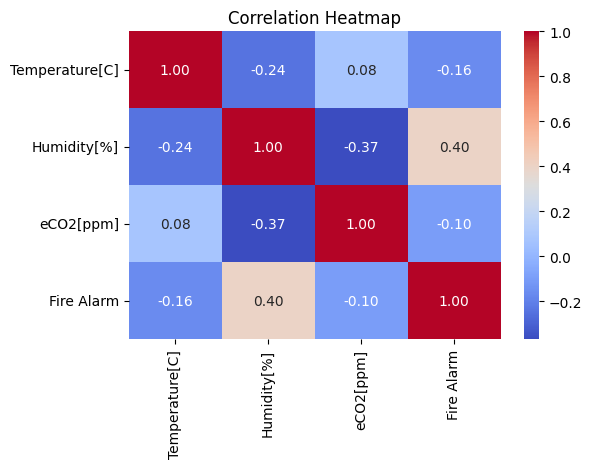

In [8]:

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
#train test split
x=df.drop(columns=['Fire Alarm'])
y=df['Fire Alarm']
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
scale=StandardScaler()
scale.fit(X_train,X_test)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [11]:
def evaluate_and_plot(y_test, y_pred, model_name, color="Blues"):
    """دالة للتقييم + الرسم"""
    # Accuracy
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=color, values_format="d")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8, 4))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=color, fmt=".2f")
    plt.title(f"Classification Report ({model_name})")
    plt.show()
    print("------------------------------------------------")


Random Forest (Original Data)
Accuracy: 0.9627973814465911
Random Forest (Original) Accuracy: 0.9627973814465911


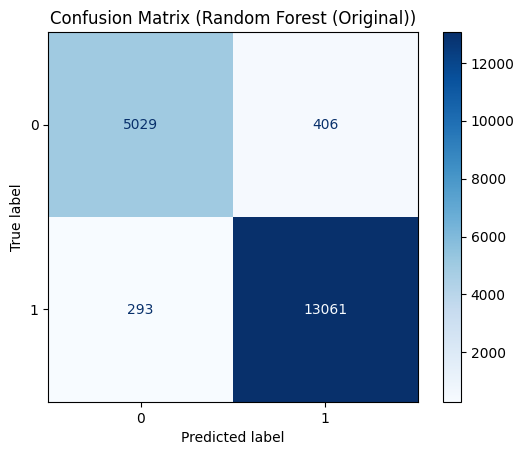

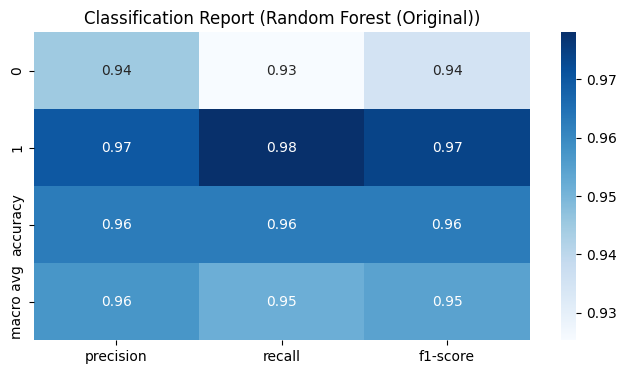

------------------------------------------------
------------------------------------------------
Random Forest (Scaled Data)
Accuracy: 0.9620522646229177
Random Forest (Scaled) Accuracy: 0.9620522646229177


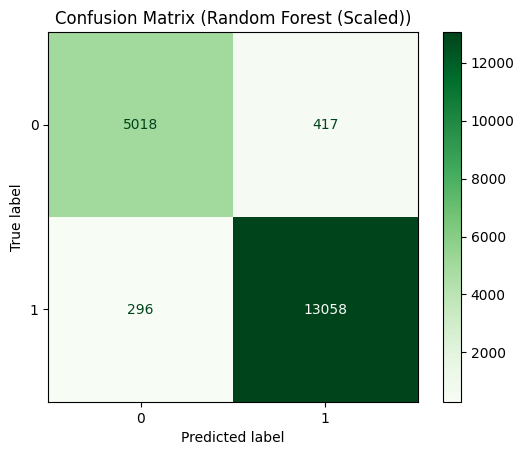

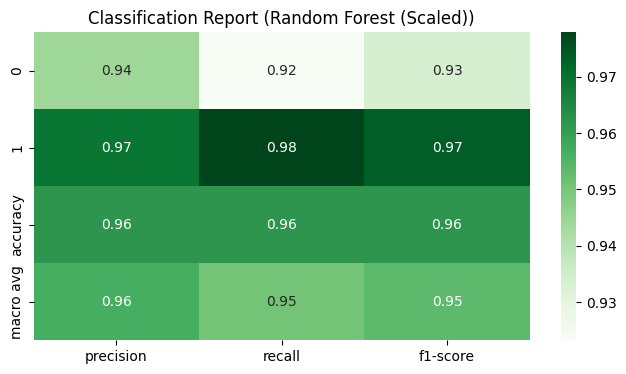

------------------------------------------------


In [12]:
#modeling
lr=RandomForestClassifier()
lr_scaled=RandomForestClassifier()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

print("Random Forest (Original Data)")
print("Accuracy:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
evaluate_and_plot(y_test, y_pred, "Random Forest (Original)", "Blues")

print("------------------------------------------------")

print("Random Forest (Scaled Data)")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
#print(classification_report(y_test, y_pred_scaled))
evaluate_and_plot(y_test, y_pred_scaled, "Random Forest (Scaled)", "Greens")



In [13]:
# example: your new input sample (same feature structure as X_train)
new_sample = [[0, 0, 1358]]  # put your actual values here

# predict using the model trained on unscaled data
prediction = lr.predict(new_sample)
print("Prediction (unscaled model):", prediction)


Prediction (unscaled model): [0]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
import joblib
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

joblib.dump(lr, 'Cognitive.pkl')


['Cognitive.pkl']